In [1]:
import pickle
import os

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')  # Importante: encoding='bytes' para Python 3
    return dict

# Ruta al batch
path = r"C:\Heri\GitHub\.Semester\Data-Mining\07-Reduccion-de-Dimensionalidad\02-Ejercicio\cifar-10-batches-py"
batch_file = os.path.join(path, "data_batch_1")

data_dict = unpickle(batch_file)

In [ ]:
print(data_dict.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


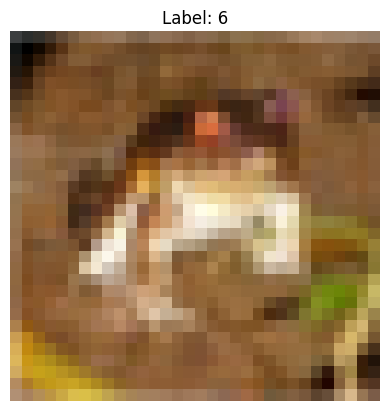

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer la imagen y su etiqueta
img_flat = data_dict[b'data'][0]
label = data_dict[b'labels'][0]

# Convertir a imagen 32x32x3
img_R = img_flat[0:1024].reshape(32, 32)
img_G = img_flat[1024:2048].reshape(32, 32)
img_B = img_flat[2048:].reshape(32, 32)
img = np.stack([img_R, img_G, img_B], axis=2)

# Mostrar la imagen
plt.imshow(img.astype(np.uint8))
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [5]:
meta_file = os.path.join(path, "batches.meta")
meta_dict = unpickle(meta_file)
label_names = [label.decode('utf-8') for label in meta_dict[b'label_names']]
print(label_names[label])  # Nombre de la clase de la imagen mostrada

frog


In [ ]:
import pickle
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Script para PCA en CIFAR-100: clases "class1" y "class2"
# ------------------------------------------------------------------

def unpickle(file_path):
    """Carga un archivo pickle de Python y devuelve el diccionario."""
    with open(file_path, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

# Ruta a la carpeta donde tienes la versión Python de CIFAR-100
cifar100_path = r"C:\Heri\GitHub\.Semester\Data-Mining\07-Reduccion-de-Dimensionalidad\02-Ejercicio\cifar-10-batches-py"

# Carga de los datos de entrenamiento y metadatos
train_dict = unpickle(os.path.join(cifar100_path, 'data_batch_1'))
meta_dict  = unpickle(os.path.join(cifar100_path, 'batches.meta'))

# Decodificar nombres de clases
fine_label_names = [name.decode('utf-8') for name in meta_dict[b'fine_label_names']]

# Obtener los índices de las clases class1 y class2
idx_class1 = fine_label_names.index('class1')
idx_class2 = fine_label_names.index('class2')

# Convertir datos y etiquetas a numpy
data = train_dict[b'data']               # (50000, 3072)
labels = np.array(train_dict[b'fine_labels'])

# Filtrar solo las muestras de class1 y class2
mask = np.isin(labels, [idx_class1, idx_class2])
X = data[mask]
y = labels[mask]

# Pipeline: escalado + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Ajustar PCA (sin supervisión) y transformar
X_pca = pipeline.fit_transform(X)
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Heri\\GitHub\\.Semester\\Data-Mining\\07-Reduccion-de-Dimensionalidad\\02-Ejercicio\\cifar-100-python\\train'

In [ ]:
# ------------------------------------------------------------------
# Script para PCA en CIFAR-100: clases "class1" y "class2"
# ------------------------------------------------------------------

def unpickle(file_path):
    """Carga un archivo pickle de Python y devuelve el diccionario."""
    with open(file_path, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

# Ruta a la carpeta donde tienes la versión Python de CIFAR-100
cifar100_path = r"C:\Heri\GitHub\.Semester\Data-Mining\07-Reduccion-de-Dimensionalidad\02-Ejercicio\cifar-10-batches-py"

# Carga de los datos de entrenamiento y metadatos
train_dict = unpickle(os.path.join(cifar100_path, 'data_batch_1'))
meta_dict  = unpickle(os.path.join(cifar100_path, 'batches.meta'))

In [10]:
meta_dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [23]:
class1 = 'bird'
class2 = 'automobile'

In [30]:

# Decodificar nombres de clases
fine_label_names = [name.decode('utf-8') for name in meta_dict[b'label_names']]

# Obtener los índices de las clases class1 y class2
idx_class1 = fine_label_names.index(class1)
idx_class2 = fine_label_names.index(class2)

In [31]:
# Convertir datos y etiquetas a numpy
data = train_dict[b'data']               # (50000, 3072)
labels = np.array(train_dict[b'labels'])

In [32]:
# Filtrar solo las muestras de class1 y class2
mask = np.isin(labels, [idx_class1, idx_class2])
X = data[mask]
y = labels[mask]

In [33]:
# Pipeline: escalado + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [34]:
# Ajustar PCA (sin supervisión) y transformar
X_pca = pipeline.fit_transform(X)
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

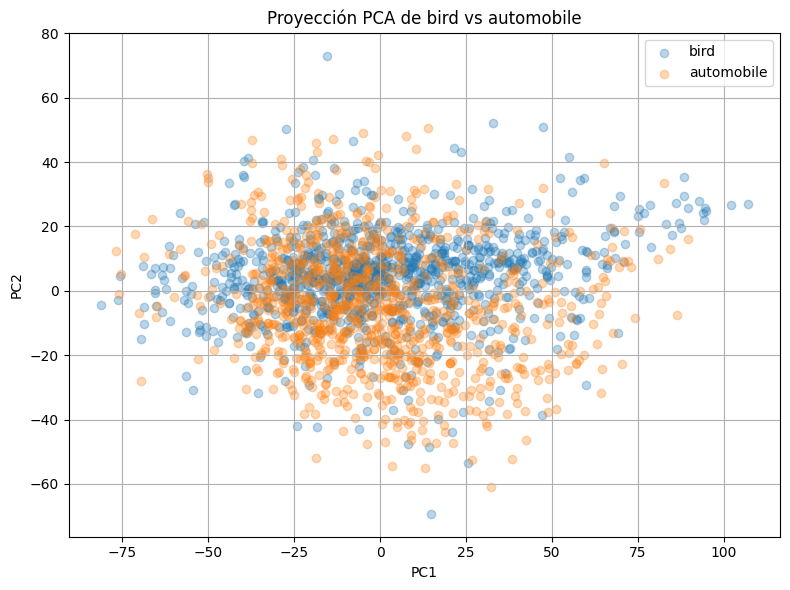

In [37]:
# --------------------------------------------------
# Gráfico 1: Proyección 2D con etiquetas coloreadas
# --------------------------------------------------
plt.figure(figsize=(8,6))
# class1
mask_d = (y == idx_class1)
plt.scatter(X_pca[mask_d, 0], X_pca[mask_d, 1], marker='o', label=class1, alpha=0.3)
# class2
mask_l = (y == idx_class2)
plt.scatter(X_pca[mask_l, 0], X_pca[mask_l, 1], marker='o', label=class2, alpha=0.3)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Proyección PCA de {class1} vs {class2}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

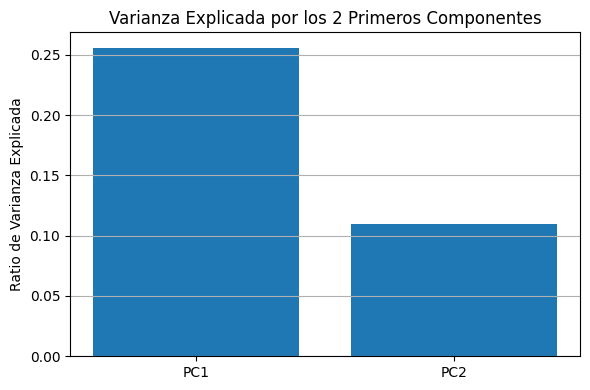

In [21]:

# --------------------------------------------------
# Gráfico 2: Varianza explicada por PC1 y PC2
# --------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar([1, 2], explained_variance, tick_label=['PC1', 'PC2'])
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Varianza Explicada por los 2 Primeros Componentes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()